## Domain: Natural Disaster

## Natural Disaster Type: Flood

## Problem Statement: Designing a model to predict the possibility of flood by using rainfall data from different subdivisions of India from the year 1901 to 2017

### Contributors: Reshma Joseph, Akshitha M K, Sreehari T

##### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from pandas import Series, DataFrame


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Collection

##### Reading the dataset to the python environment and understanding data

In [2]:
data=pd.read_csv('Rainfall Data.csv')

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
data.shape

(4188, 19)

In [5]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

In [7]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4184.000000,4185.000000,4182.000000,4184.000000,4185.000000,4183.000000,4181.000000,4184.000000,4182.000000,4181.000000,4177.000000,4178.000000,4162.000000,4182.000000,4179.000000,4178.000000,4175.000000
mean,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,33.717097,33.793128,35.731734,46.927963,68.150985,122.695137,234.292087,268.850702,188.426071,135.547646,99.194851,68.358706,43.053759,902.599421,59.293904,201.198627,706.666045,166.863171
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.800000,175.600000,155.850000,100.400000,14.600000,0.600000,0.100000,803.025000,4.000000,24.000000,573.850000,34.000000
50%,1959.000000,5.950000,6.500000,7.900000,15.450000,36.900000,138.800000,285.000000,258.500000,173.700000,65.200000,9.400000,3.000000,1120.350000,18.900000,74.800000,880.600000,97.700000
75%,1988.000000,22.000000,26.600000,31.375000,49.650000,97.800000,305.000000,418.500000,377.625000,266.125000,148.300000,45.300000,17.500000,1643.575000,50.175000,196.950000,1287.450000,211.800000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [8]:
data['SUBDIVISION'].nunique()

36

##### Inference:
    1. The dataset has 19 features and 4188 entries
    2. Data is from 36 subdivisions spanning from 1901 to  2017
    3. Data contains monthly, annual and seasonal rainfall data

### Data Preprocessing(part 1)

#### 1. Feature Engineering

In [9]:
# Creating a new data frame containing mean value of annual rainfall in different subdivisions

x=pd.DataFrame(data.groupby("SUBDIVISION")['ANNUAL'].mean())
x

,ANNUAL
SUBDIVISION,
Andaman & Nicobar Islands,2926.373585
Arunachal Pradesh,3403.959140
Assam & Meghalaya,2579.133333
Bihar,1196.563248
Chhattisgarh,1369.136752
Coastal Andhra Pradesh,1050.304274
Coastal Karnataka,3397.637931
East Madhya Pradesh,1203.035043
East Rajasthan,656.501709


In [10]:
x.shape

(36, 1)

In [11]:
x=x.reset_index() 
x

,SUBDIVISION,ANNUAL
0,Andaman & Nicobar Islands,2926.373585
1,Arunachal Pradesh,3403.959140
2,Assam & Meghalaya,2579.133333
3,Bihar,1196.563248
4,Chhattisgarh,1369.136752
5,Coastal Andhra Pradesh,1050.304274
6,Coastal Karnataka,3397.637931
7,East Madhya Pradesh,1203.035043
8,East Rajasthan,656.501709
9,East Uttar Pradesh,975.864957


In [12]:
# Creating a new dataframe by merging data and x 

df = data.merge(x, on='SUBDIVISION', how='left')

In [13]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_x,JF,MAM,JJAS,OND,ANNUAL_y
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2926.373585
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2926.373585
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2926.373585
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2926.373585
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2926.373585


In [14]:
# Assigning mean value of annual rainfall to dataset as a new column

data['MEAN ANNUAL']=df['ANNUAL_y']

In [15]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND,MEAN ANNUAL
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2926.373585
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2926.373585
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2926.373585
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2926.373585
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2926.373585


In [16]:
#Creating a new column as Prediction which predicts flood as yes(1) if sum of monthly rainfall is greater than mean of annual rainfall of that subdivision and no(0) if otherwise

data['Prediction'] = np.where(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)>data['MEAN ANNUAL'], 1, 0)

# This column will be used as target for the model

In [17]:
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND,MEAN ANNUAL,Prediction
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2926.373585,1
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2926.373585,1
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2926.373585,1
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2926.373585,1
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2926.373585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,...,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6,1587.294286,0
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,...,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5,1587.294286,0
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,...,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4,1587.294286,1
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,...,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4,1587.294286,0


#### 2. Missing value identification and handling

1. Numeric Data: Imputing with Mean/Median/Mode/Backward fill/ Forward fill
Null values are replaced with mean/median.mode in this method. This is the statistical method of handling Null values. This method yields good results when compared to removing null values.

The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value.

2. Categorical Data
Replacing those null values with most frequent value among them

In [18]:
data.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
MEAN ANNUAL     0
Prediction      0
dtype: int64

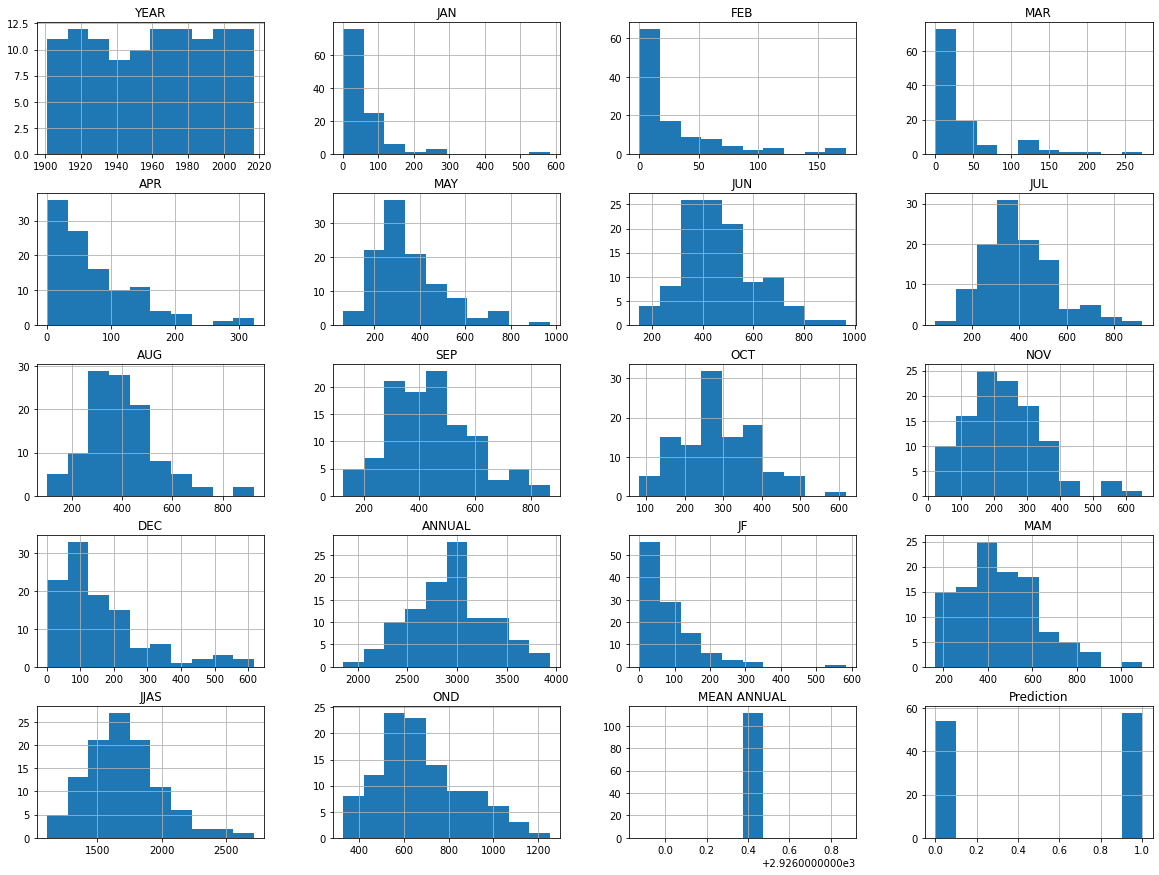

In [19]:
freqgraph=data[data['SUBDIVISION']=='Andaman & Nicobar Islands']
freqgraph.hist(figsize=(20,15))
plt.show()

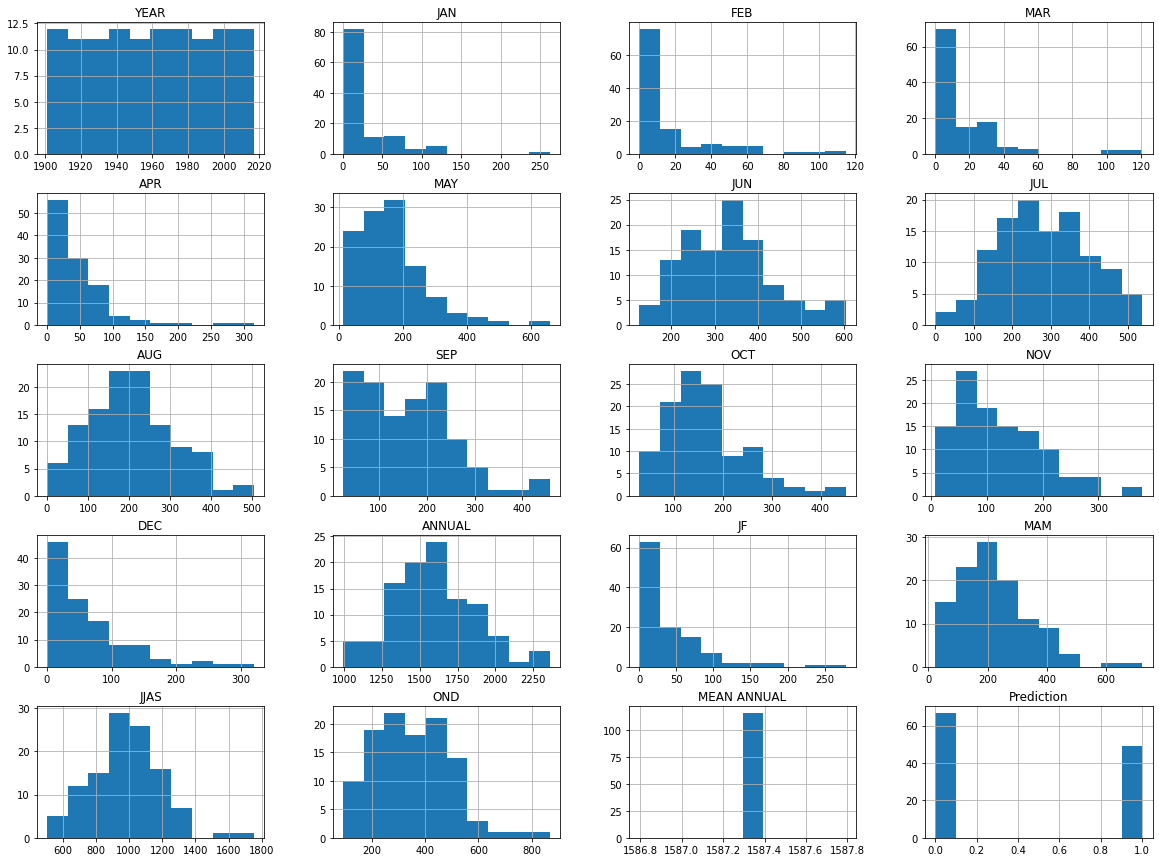

In [20]:
freqgraph=data[data['SUBDIVISION']=='Lakshadweep']
freqgraph.hist(figsize=(20,15))
plt.show()

From the above frequency graph we can see that different parameters have different distribution(mostly normal distribution), so we will be taking mean of the each column in that subdivision to fill missing values

In [21]:
for x in data['SUBDIVISION'].unique():
    for i in ['JAN']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['JAN'].mean()) 
    for i in ['FEB']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['FEB'].mean()) 
    for i in ['MAR']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['MAR'].mean())
    for i in ['APR']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['APR'].mean()) 
    for i in ['MAY']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['MAY'].mean()) 
    for i in ['JUN']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['JUN'].mean()) 
    for i in ['JUL']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['JUL'].mean()) 
    for i in ['AUG']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['AUG'].mean()) 
    for i in ['SEP']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['SEP'].mean())
    for i in ['OCT']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['OCT'].mean()) 
    for i in ['NOV']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['NOV'].mean()) 
    for i in ['DEC']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['DEC'].mean()) 
    for i in ['ANNUAL']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['ANNUAL'].mean()) 
    for i in ['JF']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['JF'].mean())
    for i in ['MAM']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['MAM'].mean()) 
    for i in ['JJAS']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['JJAS'].mean()) 
    for i in ['OND']:
        data[i]=data[i].fillna(data[data['SUBDIVISION']==x]['OND'].mean()) 

In [22]:
data.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
MEAN ANNUAL    0
Prediction     0
dtype: int64

Note: All missing values have been handled

### Exploratory data Analysis

In [23]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND',
       'MEAN ANNUAL', 'Prediction'],
      dtype='object')

##### 1. Highest Rainfall ever received in a year in Subdivisions

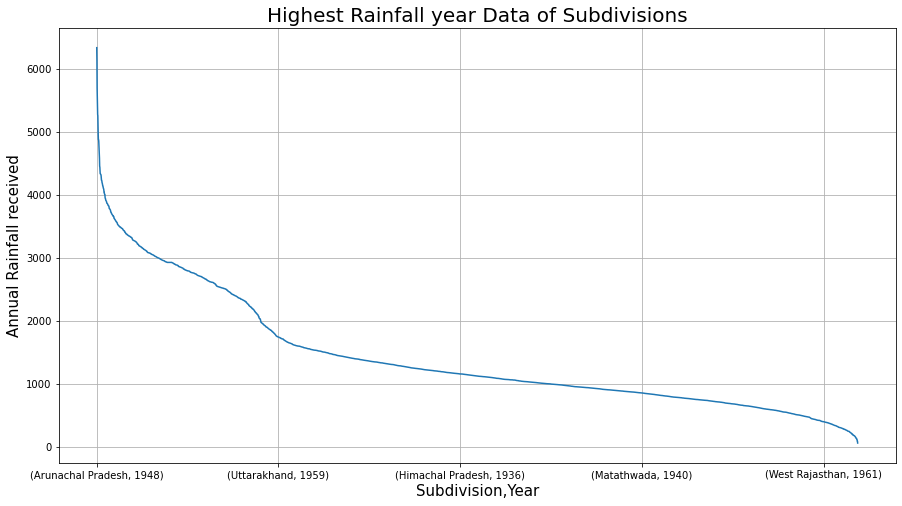

In [24]:
plt.figure(figsize=(15,8))
data.groupby(['SUBDIVISION','YEAR'])['ANNUAL'].sum().sort_values(ascending=False).plot()

plt.grid()
plt.xlabel("Subdivision,Year",fontsize=15)
plt.ylabel("Annual Rainfall received",fontsize=15)
plt.title('Highest Rainfall year Data of Subdivisions',fontsize=20);

Insight:
        
        Here, the plot represents the analysis of the highest amount of annual rainfall recieved in the states , over the span of years from 1901-2017. From here, we can infer that the highest amount of rainfall ever received in span of given data is in year 1948, in the state Arunachal Pradesh.

##### 2. Total amount of rainfall recieved overall by each subdivision

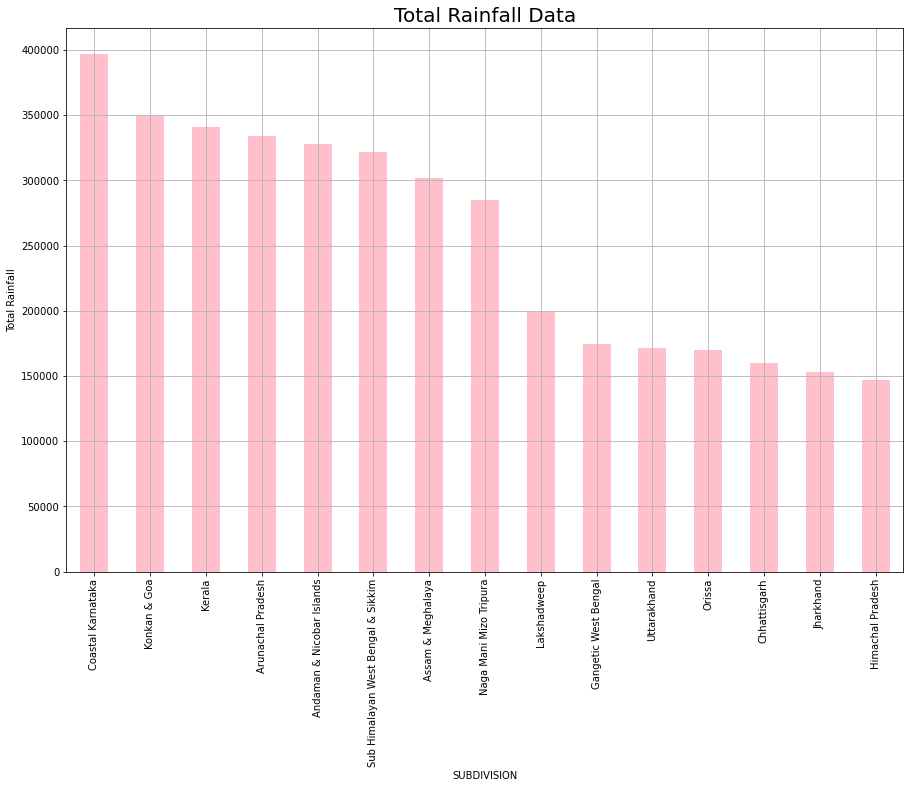

In [25]:
plt.figure(figsize=(15,10))
data.groupby(['SUBDIVISION'])['ANNUAL'].sum().sort_values(ascending=False).head(15).plot(kind='bar', color = 'pink')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall Data',fontsize=20)
plt.grid();

Insight:

    Here, the plot represents the analysis of the total amount of annual rainfall recieved in the subdivisions , over the total span of years from 1901-2017. From here, we can infer that the highest amount of rainfall receiving state overall is Coastal Karnataka

##### 3. The month with the hightest rainfall

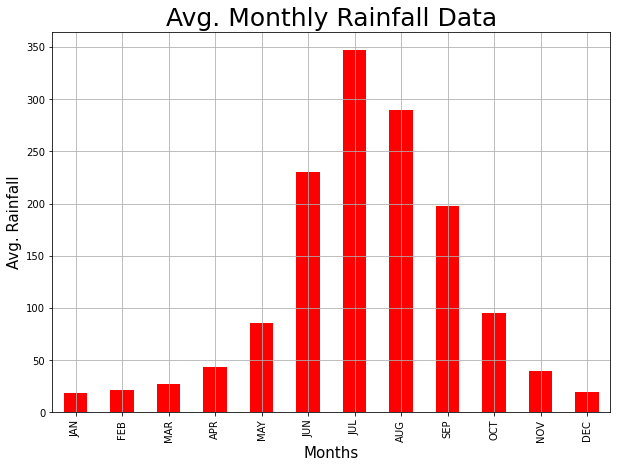

In [26]:
plt.figure(figsize=(10,7))
data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC']].mean().plot(kind= 'bar', color='red')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Avg. Rainfall',fontsize=15)
plt.title('Avg. Monthly Rainfall Data',fontsize=25)
plt.grid()
plt.show();

Insight:

    From graph, we analysed July has the most rainfall on average. By contrast, December and Jan have the least rainfall. Moreover, there are many differences in rainfall amount among months.

###### 4. Season wise rainfall in India

<Figure size 720x144 with 0 Axes>

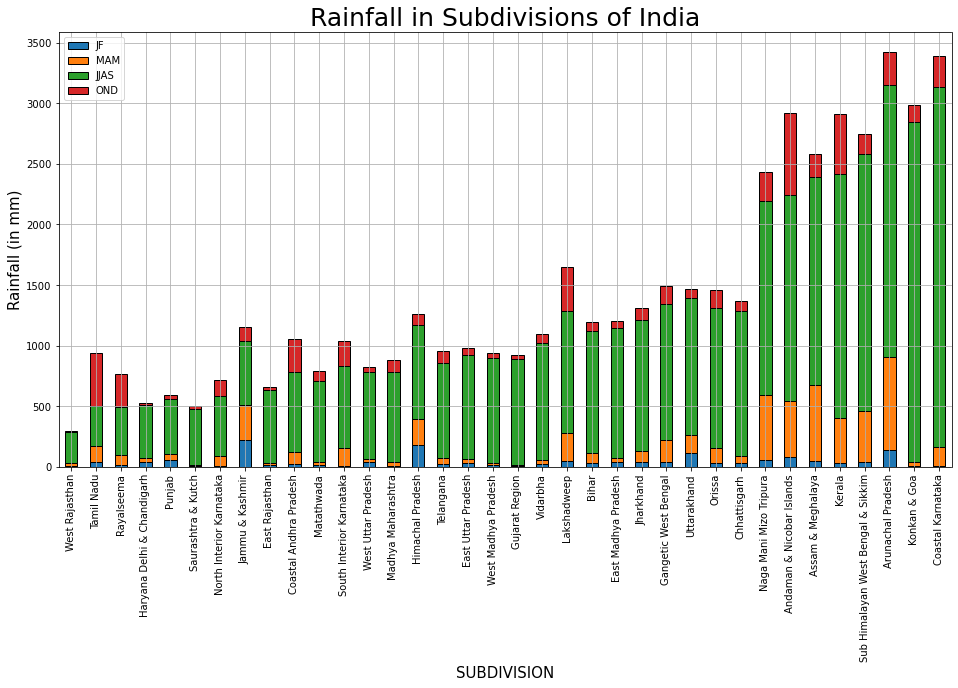

In [27]:
plt.figure(figsize=(10,2))
data[['SUBDIVISION', 'JF', 'MAM', 'JJAS', 'OND']].groupby('SUBDIVISION').mean().sort_values('JJAS').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8));
plt.xlabel('SUBDIVISION',fontsize=15)
plt.ylabel('Rainfall (in mm)',fontsize=15)
plt.title('Rainfall in Subdivisions of India',fontsize=25)
plt.grid();

Insight:

    The above graph depicts the average rainfall received in each season in varous subdivisions of India. From here, we can conclude about the highest rainfall receiving state of India and can see that in which season our country receives the highest rainfall, which results to be Jun-Sept and thus we sorted the graph according to average amount lof rainfall in this season.

##### 5. Heat Map of Rainfall

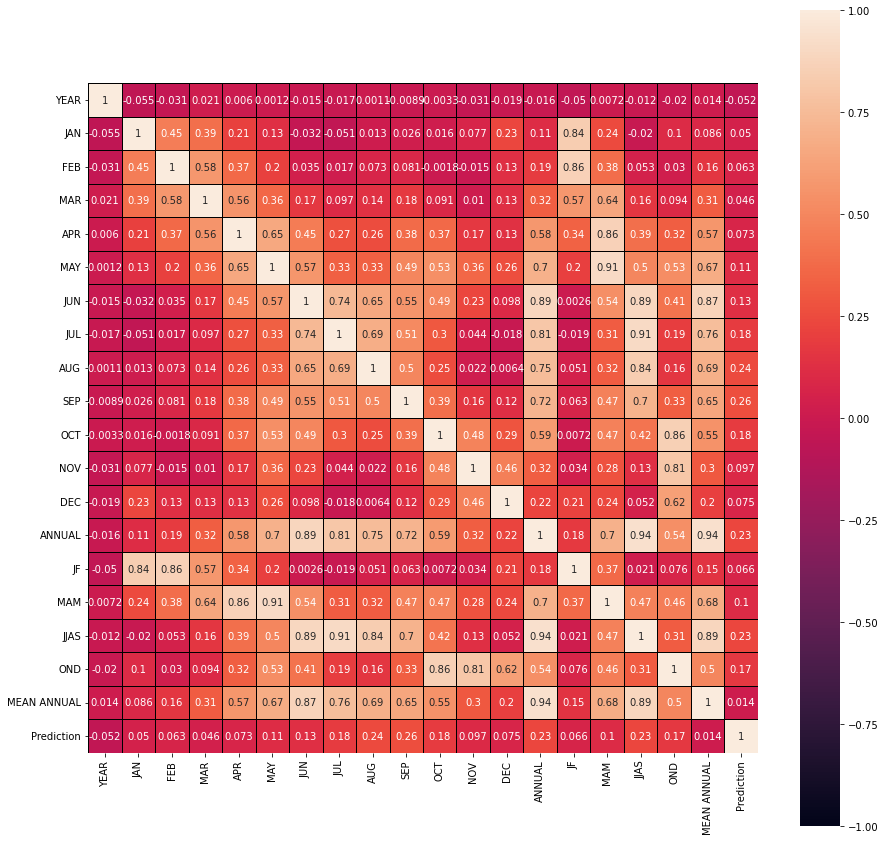

In [28]:
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

Insight:

    From here, we can see that Annual rainfall has very high correlation to the rainfall received in the months of Jun-Sep

##### 6. Box Plot of Annual Rainfall in Subdivisions of India

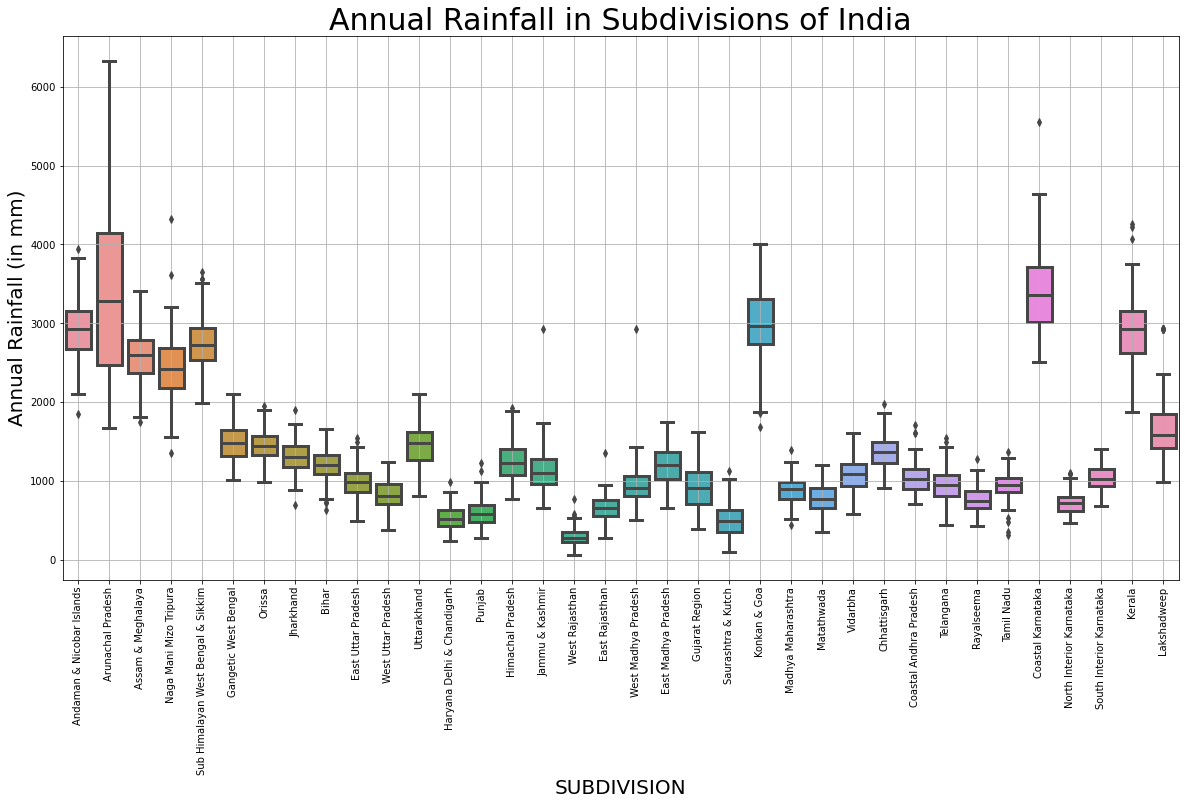

In [29]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=data, width=0.8,linewidth=3);
ax.set_xlabel('SUBDIVISION',fontsize=20)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=30)
ax.tick_params(axis='x',labelsize=10,rotation=90)
ax.tick_params(axis='y',labelsize=10,rotation=0)
plt.grid();

Insights:

    From here, we can see that Arunachal Pradesh has recorded maximum rainfall annually but its median is similar to Coastal Karnataka, which means their average of total annual rainfall over years is approximately same, but the highest ever rainfall in a year is received by Arunachal Pradesh.

##### 7. Annual Rainfall from Year 1901 to 2017 in India

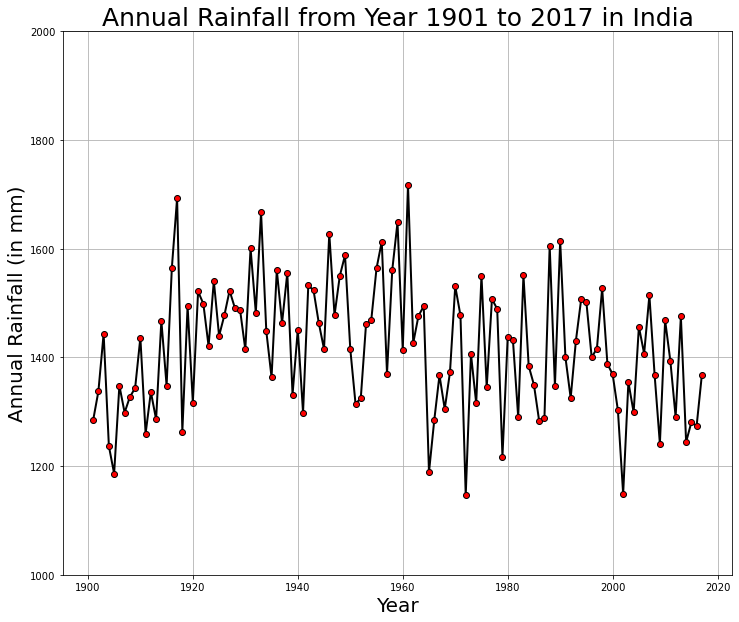

In [30]:
# Visualizing annual rainfall over the years(1901-2017) in India

data.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,2000),color='k',marker='o',markerfacecolor='red',linestyle='-',linewidth=2,figsize=(12,10))
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall from Year 1901 to 2017 in India',fontsize=25)

plt.grid()

Insights:

    The graph above depicts the average rainfall received each year in India over the years from 1901- 2017. Hence, we can summarise about the years when there was very less rainfall in India, and when the rainfall was more.

## Data Preprocessing(part 2)

#### 3. Encoding

In [31]:
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
JF             float64
MAM            float64
JJAS           float64
OND            float64
MEAN ANNUAL    float64
Prediction       int32
dtype: object

##### Label Encoding

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

Since the column subdivision is object type, converting it to numerical value using encoding

In [32]:
data['SUBDIVISION'].value_counts()

West Madhya Pradesh                   117
East Rajasthan                        117
Coastal Karnataka                     117
Tamil Nadu                            117
Rayalseema                            117
Telangana                             117
Coastal Andhra Pradesh                117
Chhattisgarh                          117
Vidarbha                              117
Matathwada                            117
Madhya Maharashtra                    117
Konkan & Goa                          117
Saurashtra & Kutch                    117
Gujarat Region                        117
East Madhya Pradesh                   117
Kerala                                117
West Rajasthan                        117
South Interior Karnataka              117
Jammu & Kashmir                       117
Himachal Pradesh                      117
Punjab                                117
Haryana Delhi & Chandigarh            117
Uttarakhand                           117
West Uttar Pradesh                

In [33]:
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
 
# Encode labels in column 'Classification'.
data['SUBDIVISION']= label_encoder.fit_transform(data['SUBDIVISION'])
 
data['SUBDIVISION'].unique()

array([ 0,  1,  2, 21, 28, 10, 23, 15,  3,  9, 35, 31, 12, 24, 13, 14, 34,
        8, 33,  7, 11, 26, 17, 19, 20, 32,  4,  5, 30, 25, 29,  6, 22, 27,
       16, 18])

In [34]:
data['SUBDIVISION'].value_counts()

33    117
8     117
6     117
29    117
25    117
30    117
5     117
4     117
32    117
20    117
19    117
17    117
26    117
11    117
7     117
16    117
34    117
27    117
14    117
13    117
24    117
12    117
31    117
35    117
9     117
3     117
15    117
23    117
10    117
28    117
21    117
2     117
22    117
18    116
0     112
1      99
Name: SUBDIVISION, dtype: int64

label encoder has changed the feature subdivision into numeric values from 0 to 35

In [35]:
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND,MEAN ANNUAL,Prediction
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2926.373585,1
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2926.373585,1
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2926.373585,1
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2926.373585,1
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2926.373585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,18,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,...,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6,1587.294286,0
4184,18,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,...,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5,1587.294286,0
4185,18,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,...,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4,1587.294286,1
4186,18,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,...,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4,1587.294286,0


In [36]:
data.dtypes

SUBDIVISION      int32
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
JF             float64
MAM            float64
JJAS           float64
OND            float64
MEAN ANNUAL    float64
Prediction       int32
dtype: object

Entire data is now in numeric format

### Modeling

#### Splitting the data

In [37]:
data.shape

(4188, 21)

In [38]:
x=data.drop(['Prediction'],axis=1)

In [39]:
y=data['Prediction']

In [40]:
#Splitting data into train and test samples in the ratio 80:20

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [41]:
x_train.shape

(3350, 20)

In [42]:
y_train.shape

(3350,)

In [43]:
x_test.shape

(838, 20)

In [44]:
y_test.shape

(838,)

##### Finding out which classification model gives the best result to predict:

Training the model
Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is. We will be implementing these algorithms to compare:

1] Logistic Regression

2] K – Nearest Neighbour (KNN)

3] Support Vector Machine (SVM)

4] Decision Trees

5] Gradient Boosting

6] Extreme Gradient Boosting.

7] Random Forest Algorithm

Let us start building our model and predicting accuracy of every algorithm used. We can also check which gives the best result.

#### 1. Logistic Regression

In [45]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       441
           1       0.98      0.99      0.99       397

    accuracy                           0.99       838
   macro avg       0.99      0.99      0.99       838
weighted avg       0.99      0.99      0.99       838

[[435   6]
 [  4 393]]
accuracy is 0.9880668257756563


#### 2. KNN Classifier

In [46]:
# Finding best k value
acc_values=[]

neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [47]:
acc_values

[0.9307875894988067,
 0.918854415274463,
 0.9307875894988067,
 0.9236276849642004,
 0.9331742243436754,
 0.9248210023866349,
 0.9295942720763724,
 0.9272076372315036,
 0.9284009546539379,
 0.9272076372315036,
 0.9272076372315036,
 0.9176610978520287]

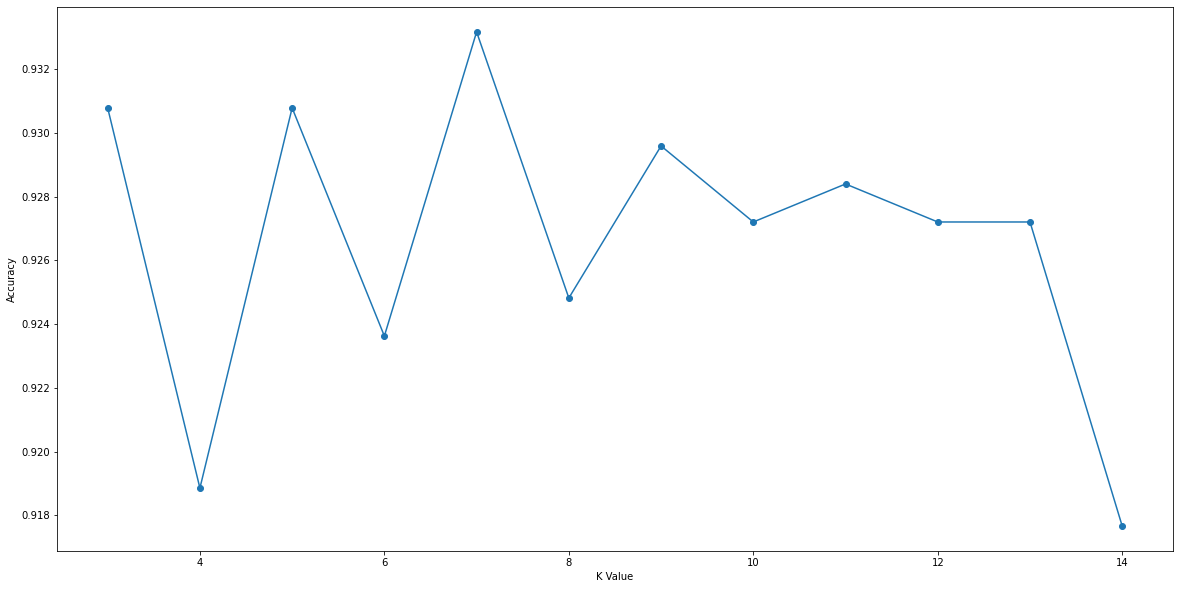

In [48]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy');

Note: From the above plot we can see that accuracy is highest when k value chosen is 7.

In [49]:

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.91      0.96      0.94       441
           1       0.96      0.90      0.93       397

    accuracy                           0.93       838
   macro avg       0.94      0.93      0.93       838
weighted avg       0.93      0.93      0.93       838

[[425  16]
 [ 40 357]]
accuracy is 0.9331742243436754


#### 3. Support Vector Machine Classifier

In [50]:
svm = SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       441
           1       0.96      0.93      0.95       397

    accuracy                           0.95       838
   macro avg       0.95      0.95      0.95       838
weighted avg       0.95      0.95      0.95       838

[[426  15]
 [ 26 371]]
accuracy is 0.951073985680191


#### 4. Decision Tree

In [51]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       441
           1       0.96      0.96      0.96       397

    accuracy                           0.96       838
   macro avg       0.96      0.96      0.96       838
weighted avg       0.96      0.96      0.96       838

[[423  18]
 [ 14 383]]
accuracy is 0.9618138424821002


#### 5. Gradient Boosting Classifier

In [52]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       441
           1       0.98      0.96      0.97       397

    accuracy                           0.97       838
   macro avg       0.97      0.97      0.97       838
weighted avg       0.97      0.97      0.97       838

[[432   9]
 [ 16 381]]
accuracy is 0.9701670644391408


#### 6. Extreme Gradient Boosting

In [53]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

[00:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       441
           1       0.99      0.98      0.98       397

    accuracy                           0.99       838
   macro avg       0.99      0.99      0.99       838
weighted avg       0.99      0.99      0.99       838

[[437   4]
 [  8 389]]
accuracy is 0.9856801909307876


#### 7. Random Forest Classifier

In [54]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       441
           1       0.95      0.92      0.93       397

    accuracy                           0.94       838
   macro avg       0.94      0.94      0.94       838
weighted avg       0.94      0.94      0.94       838

[[420  21]
 [ 32 365]]
accuracy is 0.9367541766109785


Insight: 

Accuracy
  1. Logistic Regression: Accuracy- 98.8
  2. KNN Classifier: Accuracy-93.31
  3. SVM Classifier: Accuracy-95.1
  4. Decision Tree Classifier: Accuracy-96.1
  5. Gradient Boosting Classifier: Accuracy- 97.01
  6. Extreme Gradient Boosting Classifier: Accuracy- 98.56
  7. Random Forest Classifier: Accuracy- 93.67
  
 From the above data Logistic Regression and Extreme Gradient Boosting Models have high accuracy.
 
 False predictions:
 1. Logistic Regression: 10
 2. Extreme Gradient Boosting: 12
 
Conclusion:
For this dataset, Logistic Regression can be used as a model for prediction.

### Data preprocessing(part 3)

#### Feature Importance

In [55]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

ANNUAL         18.400221
MEAN ANNUAL    15.610310
JJAS            9.829151
AUG             5.326979
SEP             5.056502
JUL             4.459084
OND             4.316613
SUBDIVISION     4.100551
MAM             3.411853
JUN             3.331965
OCT             3.325605
MAY             3.152247
YEAR            2.973603
APR             2.909597
JF              2.758545
NOV             2.420052
FEB             2.311652
MAR             2.188206
JAN             2.080769
DEC             2.036496
dtype: float64

Insight:

    From the above data we can see that features 'ANNUAL','MEAN ANNUAL' and "JJAS' carry more weightage in prediction.
    
    No feature has negligible importance(no value<1), so we cannot do feature reduction without effecting models accuracy and precision

### Feature Scaling

In [56]:
x1=x

In [57]:
x1.describe()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND,MEAN ANNUAL
count,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000
mean,17.591691,1959.220630,18.972189,21.603786,27.418903,43.099395,85.853675,230.403968,347.107004,289.846169,197.664564,95.650077,40.004728,19.299348,1418.866598,40.582499,156.473346,1065.379413,155.278624,1415.246057
std,10.344875,33.717097,33.794726,35.719302,46.894593,68.124252,122.862465,234.298769,268.634279,188.366076,135.762211,99.430455,68.983819,43.530477,907.649126,59.272242,201.473503,706.512355,169.145934,854.952307
min,0.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000,294.125641
25%,9.000000,1930.000000,0.600000,0.500000,1.000000,3.000000,8.675000,70.875000,175.900000,155.975000,100.400000,14.600000,0.600000,0.100000,805.275000,4.000000,24.175000,574.375000,34.175000,823.899145
50%,18.000000,1959.000000,6.000000,6.500000,7.900000,15.500000,36.900000,139.000000,285.250000,258.900000,173.900000,65.750000,9.450000,3.100000,1124.150000,19.000000,75.150000,881.500000,98.350000,1093.543590
75%,27.000000,1988.000000,22.100000,26.600000,31.425000,49.825000,98.200000,306.025000,418.400000,377.800000,266.425000,148.625000,45.925000,17.700000,1666.900000,50.300000,197.925000,1292.725000,214.825000,1490.612821
max,35.000000,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000,3403.959140


In [58]:
scalar = StandardScaler()

In [59]:
x1=scalar.fit_transform(x1)
x1=pd.DataFrame(x1)

In [60]:
x1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03,4.188000e+03
mean,-9.258983e-16,-2.012080e-15,-1.236054e-15,-3.668826e-15,-1.676469e-15,5.413265e-16,2.857737e-16,-1.735850e-16,-7.361722e-17,1.280812e-16,-5.697249e-16,2.464069e-16,1.398992e-15,-3.218268e-16,-8.646114e-17,-7.404270e-16,2.000946e-16,-2.878697e-16,-4.649788e-17,-3.753723e-15
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-1.700725e+00,-1.726945e+00,-5.614620e-01,-6.048933e-01,-5.847620e-01,-6.327342e-01,-6.988621e-01,-9.817868e-01,-1.292272e+00,-1.538922e+00,-1.455399e+00,-9.620945e-01,-5.799839e-01,-4.434055e-01,-1.494772e+00,-6.847614e-01,-7.767375e-01,-1.426868e+00,-9.181253e-01,-1.311482e+00
25%,-8.306255e-01,-8.667448e-01,-5.437056e-01,-5.908936e-01,-5.634351e-01,-5.886917e-01,-6.282463e-01,-6.809597e-01,-6.373998e-01,-7.107817e-01,-7.165188e-01,-8.152407e-01,-5.712852e-01,-4.411080e-01,-6.761036e-01,-6.172682e-01,-6.567322e-01,-6.950523e-01,-7.160567e-01,-6.917550e-01
50%,3.947445e-02,-6.544357e-03,-3.838983e-01,-4.228971e-01,-4.162790e-01,-4.051816e-01,-3.984905e-01,-3.901637e-01,-2.302922e-01,-1.643070e-01,-1.750664e-01,-3.007494e-01,-4.429789e-01,-3.721825e-01,-3.247420e-01,-3.641684e-01,-4.036911e-01,-2.602946e-01,-3.366053e-01,-3.763261e-01
75%,9.095744e-01,8.536561e-01,9.256427e-02,1.398910e-01,8.543789e-02,9.873735e-02,1.005010e-01,3.227933e-01,2.654222e-01,4.669861e-01,5.065375e-01,5.328473e-01,8.583142e-02,-3.674527e-02,2.733028e-01,1.639665e-01,2.057670e-01,3.218241e-01,3.520835e-01,8.816371e-02
max,1.682997e+00,1.713857e+00,1.671253e+01,1.069287e+01,1.233085e+01,8.103818e+00,8.813722e+00,5.888468e+00,7.504380e+00,7.299181e+00,7.545971e+00,8.576364e+00,8.827693e+00,1.374375e+01,5.412686e+00,1.111812e+01,7.889456e+00,4.914189e+00,6.487607e+00,2.326388e+00


In [61]:
#Splitting into train and test sample
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.2)

Applying new standardized feature values to logistic regression model

In [62]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       441
           1       0.98      0.99      0.99       397

    accuracy                           0.99       838
   macro avg       0.99      0.99      0.99       838
weighted avg       0.99      0.99      0.99       838

[[435   6]
 [  4 393]]
accuracy is 0.9880668257756563


Insight:
    
  We can see from the above data that the accuracy of the model didnt change after standardization using  standard scaler

#### Fine tuning of hyper parameters

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins

In [63]:
#Changing values of n_estimators,max_depth,random_state and criterion to see if performance of model improves

rft=RandomForestClassifier(n_estimators=850,max_depth=100, random_state=30, criterion='entropy', max_features='sqrt')

In [64]:
rft.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       n_estimators=850, random_state=30)

In [65]:
y_pred=rft.predict(x_test)
f1_score(y_test,y_pred,average='weighted')

0.9462640942050516

Inference:
By changing few of hyperparameters like n_estimators=850,max_depth=100, random_state=30, criterion='entropy', max_features='sqrt',there is increase in accuracy